In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# to display all the columns
pd.pandas.set_option("display.max_columns", None)

import datetime as dt

In [2]:
# importing the data

cust_aqus = pd.read_csv("Customer Acqusition.csv")

spend = pd.read_csv("spend.csv", parse_dates=["Month"])

repayment = pd.read_csv("repayment.csv", parse_dates=["Month"])

In [3]:
# displaying top few rows of customer Acqusition data

cust_aqus.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
# displaying top few rows of customer spend data

spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


In [5]:
# displaying top few rows of customer repayment data

repayment.head()

,SL No:,Customer,Month,Amount
0,1,A1,2004-01-12,495414.75
1,2,A1,2004-01-03,245899.02
2,3,A1,2004-01-15,259490.06
3,4,A1,2004-01-25,437555.12
4,5,A1,2005-01-17,165972.88


### 1. In the above dataset, 

#### a. In case Age is less than 18, replace it with mean of Age values 

In [6]:
# customers with age less than 18

cust_aqus[cust_aqus.Age<18]

,No,Customer,Age,City,Product,Limit,Company,Segment
13,14,A14,16,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,41,A41,13,COCHIN,Platimum,500000.0,C23,Govt
62,63,A63,15,BANGALORE,Gold,500000.0,C25,Self Employed
67,68,A68,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,70,A70,16,BOMBAY,Platimum,10001.0,C32,Self Employed
89,90,A90,16,COCHIN,Gold,500000.0,C13,Govt


In [7]:
# mean age value

np.mean(cust_aqus.Age)

46.49

In [8]:
# customers with age less than 18, replacing their age with mean age value

cust_aqus["Age"] = np.where(cust_aqus.Age<18, np.mean(cust_aqus.Age), cust_aqus.Age)

In [9]:
# diplaying top 15 rows of customer Acqusition data

cust_aqus.head(15)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.00,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.00,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.00,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.00,BANGALORE,Platimum,10002.0,C5,Normal Salary
5,6,A6,70.00,DELHI,Silver,100000.0,C6,Self Employed
6,7,A7,26.00,COCHIN,Silver,100001.0,C7,Salaried_MNC
7,8,A8,67.00,PATNA,Silver,100002.0,C8,Salaried_Pvt
8,9,A9,79.00,CHENNAI,Silver,100003.0,C9,Govt
9,10,A10,54.00,CALCUTTA,Gold,500000.0,C10,Normal Salary


#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card). 

In [10]:
# combaining customer Acqusition & customer spend data 

cust_spend = pd.merge(cust_aqus, spend, on="Customer", how="inner")

In [11]:
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07


In [12]:
# customers with Spend amount greater than Limit

cust_spend[cust_spend.Amount>cust_spend.Limit]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104,2004-01-03,RENTAL,199554.72
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118,2005-02-28,TRAIN TICKET,376887.49
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132,2004-04-06,BUS TICKET,439648.53
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146,2004-11-23,PETRO,384078.73
22,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,160,2005-09-03,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89,2006-03-30,RENTAL,483886.62
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,90184.22


In [13]:
# customers with spend amount greater than limit, replacing their spend amount with 50% of their limit

cust_spend["Amount"] = np.where(cust_spend.Amount>cust_spend.Limit, (cust_spend.Limit*0.5), cust_spend.Amount)

In [14]:
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07


#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit. 

In [15]:
# combaining customer Acqusition & customer repayment data 

cust_repayment = pd.merge(cust_aqus, repayment, on="Customer", how="inner")

In [16]:
cust_repayment.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,165972.88


In [17]:
# customers with repayment amount greater than limit

cust_repayment[cust_repayment.Amount>cust_repayment.Limit]

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104,2004-01-03,185955.07
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118,2005-02-28,412783.34
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132,2004-04-06,148038.67
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146,2004-11-23,179144.68
23,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,174,2005-08-03,381635.66
...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89,2006-03-30,462283.02
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,310992.30
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,121874.90
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,337815.57


In [18]:
# customers with repayment amount greater than limit, replacing their repayment amount with their limit

cust_repayment["Amount"] = np.where(cust_repayment.Amount>cust_repayment.Limit, cust_repayment.Limit, cust_repayment.Amount)

In [19]:
cust_repayment.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,165972.88


### 2. From the above dataset create the following summaries:

#### a. How many distinct customers exist?

In [20]:
cust_aqus.Customer.nunique()

100

#### b. How many distinct categories exist?

In [21]:
# for customer Acqusition data

print("Number of Distinct categories in variable 'City' :", cust_aqus.City.nunique())
print("Number of Distinct categories in variable 'Product' :", cust_aqus.Product.nunique())
print("Number of Distinct categories in variable 'Segment' :", cust_aqus.Segment.nunique())

Number of Distinct categories in variable 'City' : 8
Number of Distinct categories in variable 'Product' : 3
Number of Distinct categories in variable 'Segment' : 5


In [22]:
# for customer spend data

print("Number of Distinct categories in variable 'Type' :", spend.Type.nunique())

Number of Distinct categories in variable 'Type' : 15


#### c. What is the average monthly spend by customers?

In [23]:
monthly_spend_amount = pd.pivot_table(data=spend, index=spend.Month.dt.month, values="Amount", aggfunc='mean')

In [24]:
# month wise spend amount of customers

monthly_spend_amount

,Amount
Month,
1,256221.133553
2,233037.216471
3,246255.783723
4,236671.847533
5,241277.023476
6,241329.181250
7,268042.287143
8,236056.328571
9,219369.892143


#### d. What is the average monthly repayment by customers?

In [25]:
monthly_repayment_amount = pd.pivot_table(data=repayment, index=repayment.Month.dt.month, values="Amount", aggfunc="mean")

In [26]:
# month wise repayment amount of customers

monthly_repayment_amount

,Amount
Month,
1,245121.019624
2,248756.162368
3,241654.966393
4,259649.413200
5,257669.622782
6,220647.477083
7,253512.325102
8,254564.734898
9,226865.354750


#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [27]:
# combining monthly_spend_amount & monthly_repayment_amount

df = pd.merge(monthly_spend_amount, monthly_repayment_amount, left_index=True, right_index=True, suffixes=("_spend", "_repayment"))

In [28]:
df

,Amount_spend,Amount_repayment
Month,,
1,256221.133553,245121.019624
2,233037.216471,248756.162368
3,246255.783723,241654.966393
4,236671.847533,259649.413200
5,241277.023476,257669.622782
6,241329.181250,220647.477083
7,268042.287143,253512.325102
8,236056.328571,254564.734898
9,219369.892143,226865.354750


In [29]:
# monthwise profit

df["Monthly_Profit"] = df.Amount_repayment - df.Amount_spend

In [30]:
df

,Amount_spend,Amount_repayment,Monthly_Profit
Month,,,
1,256221.133553,245121.019624,-11100.113929
2,233037.216471,248756.162368,15718.945898
3,246255.783723,241654.966393,-4600.817330
4,236671.847533,259649.413200,22977.565667
5,241277.023476,257669.622782,16392.599306
6,241329.181250,220647.477083,-20681.704167
7,268042.287143,253512.325102,-14529.962041
8,236056.328571,254564.734898,18508.406327
9,219369.892143,226865.354750,7495.462607


In [31]:
# profit is defined as interest earned on monthly profit (interest rate is 2.9%)
# monthwise profit 

df["Profit"] = np.where(df.Monthly_Profit<0, 0, (df.Monthly_Profit*0.029))

In [32]:
df

,Amount_spend,Amount_repayment,Monthly_Profit,Profit
Month,,,,
1,256221.133553,245121.019624,-11100.113929,0.000000
2,233037.216471,248756.162368,15718.945898,455.849431
3,246255.783723,241654.966393,-4600.817330,0.000000
4,236671.847533,259649.413200,22977.565667,666.349404
5,241277.023476,257669.622782,16392.599306,475.385380
6,241329.181250,220647.477083,-20681.704167,0.000000
7,268042.287143,253512.325102,-14529.962041,0.000000
8,236056.328571,254564.734898,18508.406327,536.743783
9,219369.892143,226865.354750,7495.462607,217.368416


#### f. What are the top 5 product types?

In [45]:
# finding top 5 products based on spend amount

top_5 = pd.pivot_table(index="Type", data=spend, values="Amount", aggfunc="sum").sort_values(by="Amount", ascending=False).head(5)

In [46]:
top_5

,Amount
Type,
PETRO,49863174.09
CAMERA,41481571.96
FOOD,37773338.43
TRAIN TICKET,33067077.15
AIR TICKET,32955445.42


#### g. Which city is having maximum spend?

In [51]:
# using combined data of customer Acqusition and customer spend

cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07


In [60]:
# total spend with respect to each city

city_spend = cust_spend.groupby(["City"])[["Amount"]].sum()

city_spend

,Amount
City,
BANGALORE,40461647.02
BOMBAY,28603127.38
CALCUTTA,41108132.30
CHENNAI,22128635.65
COCHIN,45963513.50
DELHI,10918286.54
PATNA,15260586.97
TRIVANDRUM,15337155.87


In [78]:
# city with maximum spend

max_city_spend = city_spend.nlargest(1,"Amount")

max_city_spend

,Amount
City,
COCHIN,45963513.5


#### h. Which age group is spending more money?

In [70]:
# using combined data of customer Acqusition and customer spend

cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07


In [72]:
# total spend with by each Age group

Age_spend = cust_spend.groupby(["Age"])[["Amount"]].sum()

In [77]:
# Age group with maximum spend

top_age_group = Age_spend.sort_values(by="Amount", ascending=False).head(1)

top_age_group

,Amount
Age,
28.0,17365270.23


#### i. Who are the top 10 customers in terms of repayment?

In [87]:
# repayment Amount with by each customer

repayment_by_each_cust = pd.pivot_table(data=repayment, index="Customer", values="Amount", aggfunc="sum")

repayment_by_each_cust

,Amount
Customer,
A1,4753691.67
A10,3695647.52
A100,69551.19
A11,5310934.03
A12,8334760.16
...,...
A95,369405.96
A96,310992.30
A97,121874.90


In [89]:
# top 10 customers in terms of repayment

top_10 = repayment_by_each_cust.nlargest(10, "Amount")

top_10

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same

In [93]:
# using combined data of customer Acqusition and customer spend

cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07


In [123]:
# city wise spend on each product yearly basis

city_spend_yearly = pd.pivot_table(data=cust_spend, index=["City","Product"], columns=cust_spend.Month.dt.year, values="Amount", aggfunc="sum")

city_spend_yearly

Month                      2004         2005         2006
City       Product                                       
BANGALORE  Gold      9289878.54  12892362.99  12030611.09
           Platimum  1112732.30    912284.97    685831.27
           Silver    1291852.58    830612.34   1415480.94
BOMBAY     Gold      6987853.53   8983018.28   7917144.31
           Platimum   897264.94    711804.94    972130.01
           Silver     532089.03    508988.54   1092833.80
CALCUTTA   Gold      7477140.98  10303355.80  11167532.77
           Platimum  2037690.30   4434696.31   3589606.66
           Silver     500006.00    440147.06   1157956.42
CHENNAI    Gold      1059618.50   3740945.58   2704288.62
           Platimum  3535652.38   5053956.32   5024923.40
           Silver     282056.86    377184.49    350009.50
COCHIN     Gold      7315850.15  12110613.03  10499142.38
           Platimum  3419904.07   4960921.71   4920592.29
           Silver     814229.62    652269.38   1269990.87
DELHI      Gold      2806495.00   1964845.27   2957103.32
           Platimum   283512.89    494157.86    176788.72
           Silver     768172.30    612311.21    854899.97
PATNA      Gold      2072567.90   3252615.77   2276181.69
           Platimum  1113069.60   2883231.07   1256137.65
           Silver     756684.10    950094.19    700005.00
TRIVANDRUM Gold      2415102.84   1240375.85   2735710.87
           Platimum  2161676.67   3601443.30   2147403.75
           Silver     209667.48    269912.99    555862.12

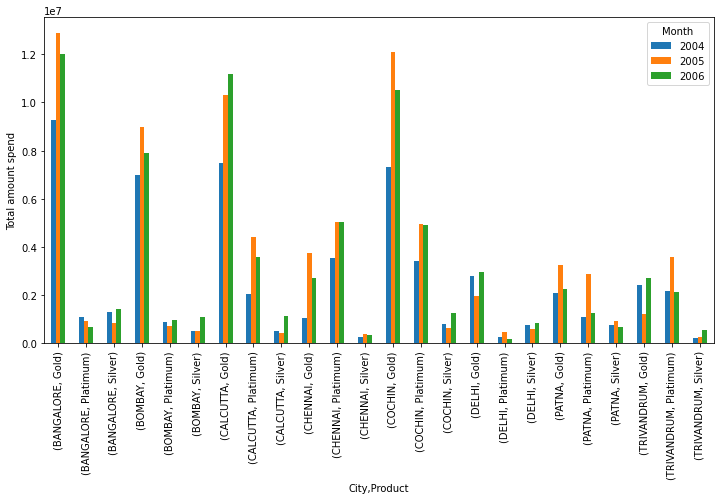

In [127]:
# graphical representation of city wise spend on each product yearly basis

city_spend_yearly.plot.bar(figsize=(12,6))
plt.ylabel("Total amount spend")
plt.show()

### 4. Create graphs for

#### a. Monthly comparison of total spends, city wise

In [120]:
# using combined data of customer Acqusition and customer spend

cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07


In [126]:
# city wise spend on monthly basis

city_spend_monthly = pd.pivot_table(data=cust_spend, index="City", columns=cust_spend.Month.dt.month, values="Amount", aggfunc="sum")

city_spend_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,9041796.84,6734494.76,5362903.07,4207980.48,6383115.13,1330685.90,2228217.69,695061.95,703018.28,1091602.61,2260603.07,422167.24
BOMBAY,5948993.33,4276988.30,5227850.50,1873785.01,3891945.60,1172594.97,177726.32,1066744.75,1278402.79,676005.70,2872049.40,140040.71
CALCUTTA,9064864.90,8150545.61,4939040.04,3457507.95,5578246.87,2293045.81,2234573.27,1548354.02,1511713.57,196357.83,2078880.93,55001.50
CHENNAI,4466961.36,4385815.95,3183643.71,2518656.99,2856199.62,1244242.16,693825.77,305875.97,745759.40,156247.17,1347779.28,223628.27
COCHIN,11714373.54,5747886.38,5645146.53,3882744.94,6581085.69,2495745.07,1290897.30,2317306.61,1382242.90,868551.89,3127999.60,909533.05
DELHI,2714261.45,1494064.06,2267149.02,777240.75,1600322.07,511276.09,50001.50,155402.16,50001.00,64615.46,391610.96,842342.02
PATNA,4916205.55,2353333.55,1437166.61,2338179.53,2136586.80,746186.13,50000.00,419383.64,70329.95,329537.34,413677.87,50000.00
TRIVANDRUM,3704336.99,2857123.89,2392316.51,1199293.45,2813534.48,400336.83,260484.50,453773.94,186063.70,285581.92,143387.40,640922.26


<ipython-input-137-e29394704b34>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


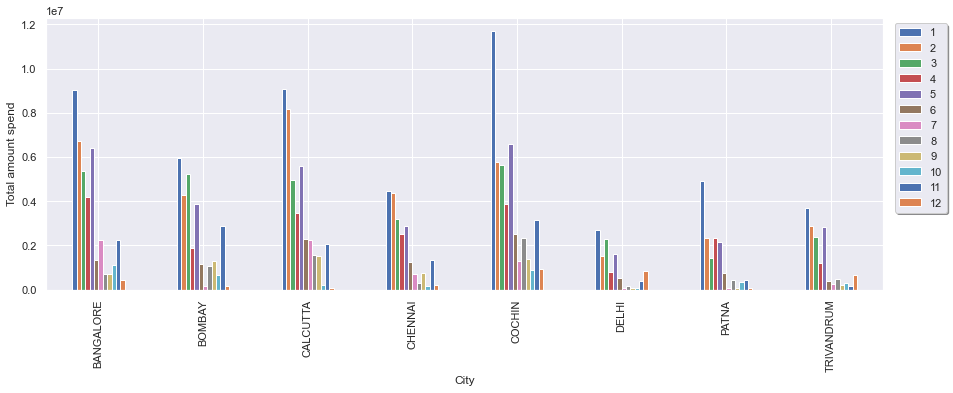

In [137]:
# graphical representation of city wise spend on monthly basis

sns.set()
city_spend_monthly.plot(kind="bar", figsize=(15,5))
ax = plt.subplot(111)
ax.legend(loc="upper center", bbox_to_anchor=(1.045,1), shadow=True, ncol=1)
plt.ylabel("Total amount spend")
plt.show()

 #### b. Comparison of yearly spend on air tickets

In [145]:
# using combined data of customer Acqusition and customer spend

cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07


In [150]:
# combined data of customer Acqusition and customer spend where "Type" is "Air Ticket"

AIR_TICKET_data =  cust_spend[cust_spend.Type=="AIR TICKET"]

AIR_TICKET_data

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,131,2006-04-19,AIR TICKET,346925.68
63,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,275,2006-03-03,AIR TICKET,5001.00
80,6,A6,70.0,DELHI,Silver,100000.0,C6,Self Employed,276,2006-04-03,AIR TICKET,50000.00
97,7,A7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,277,2006-05-03,AIR TICKET,50000.50
115,8,A8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt,278,2006-06-03,AIR TICKET,50001.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1474,75,A75,36.0,BOMBAY,Silver,100003.0,C37,Self Employed,77,2005-02-23,AIR TICKET,50001.50
1475,76,A76,66.0,BANGALORE,Silver,500000.0,C38,Self Employed,78,2005-02-03,AIR TICKET,30066.44
1476,77,A77,35.0,BANGALORE,Silver,500000.0,C39,Self Employed,79,2006-02-04,AIR TICKET,31048.93
1483,84,A84,70.0,PATNA,Silver,100000.0,C7,Govt,86,2006-03-27,AIR TICKET,50000.00


In [154]:
# analysing yearly spend on air tickets

yearly_spend = pd.pivot_table(data=AIR_TICKET_data, index=AIR_TICKET_data.Month.dt.year, values="Amount", aggfunc="sum")

yearly_spend

,Amount
Month,
2004,4357225.35
2005,10550152.21
2006,5248469.56


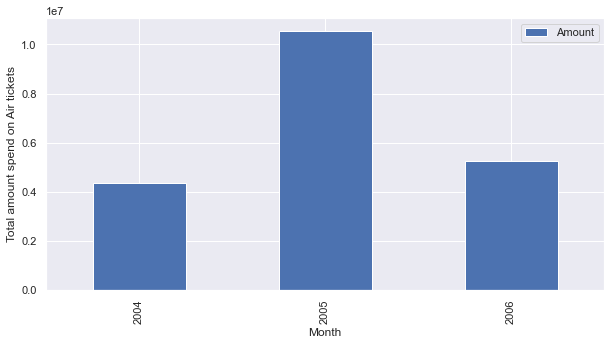

In [157]:
# graphical representation of yearly spend on air tickets

yearly_spend.plot.bar(figsize=(10,5))
plt.legend()
plt.ylabel("Total amount spend on Air tickets")
plt.show()

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [159]:
# using combined data of customer Acqusition and customer spend

cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07


In [169]:
# monthly spend for each product

monthly_spend_by_product = pd.pivot_table(data=cust_spend, index="Product", columns=cust_spend.Month.dt.month, values="Amount", aggfunc="sum")

monthly_spend_by_product

Month,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
Gold,32413831.83,24779179.55,19256972.48,13170572.59,21548169.76,6538862.64,5167416.37,4954030.42,3816887.62,3018223.38,9203267.46,2332940.96
Platimum,14951578.51,9134054.58,7288837.68,5182493.86,8151926.49,2965712.71,1288156.26,1714762.80,1667840.84,550275.04,2741618.42,750156.19
Silver,4206383.62,2087018.37,3909405.83,1902322.65,2140940.01,689537.61,530153.72,293109.82,442803.13,100001.50,691102.63,200537.90


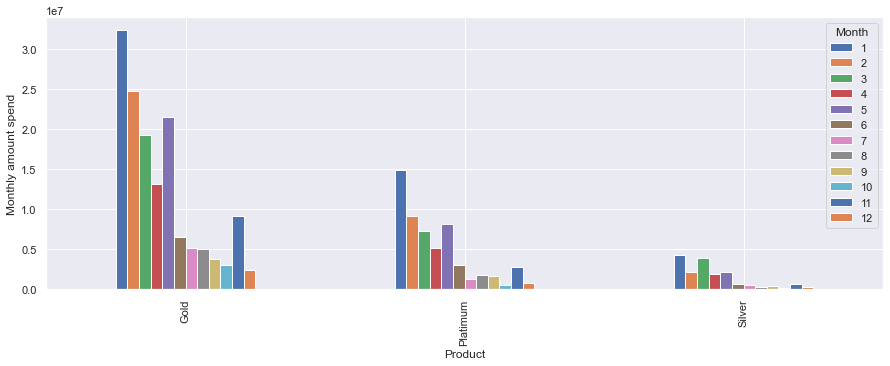

In [173]:
# graphcal representation of monthly spend for each product

monthly_spend_by_product.plot.bar(figsize=(15,5))
plt.ylabel("Monthly amount spend")
plt.show()

#### 5. Write user defined PYTHON function to perform the following analysis: 
#### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [178]:
# using combined data of customer Acqusition and customer repayment 

cust_repayment.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,165972.88


In [180]:
# user defined function

def analysis():
    result=0
    product=input('Enter the Product:')
    time_period=input('Enter the time period you want to check:')
    if time_period=='year':
        if product=='Gold':
            result=cust_repayment[cust_repayment.Product=='Gold'].groupby(cust_repayment['Month'].dt.year).Amount.sum().nlargest(10)
        elif  product=='Silver':
            result=cust_repayment[cust_repayment.Product=='Silver'].groupby(cust_repayment['Month'].dt.year).Amount.sum().nlargest(10) 
        elif product=='Platinum':
            result=cust_repayment[cust_repayment.Product=='Platinum'].groupby(cust_repayment['Month_renew'].dt.year).Amount.sum().nlargest(10)
        else:
            print('Product is wrong')
    elif  time_period=='month':
        if product=='Gold':
            result=cust_repayment[cust_repayment.Product=='Gold'].groupby(cust_repayment['Month'].dt.month).Amount.sum().nlargest(10)
        elif  product=='Silver':
            result=cust_repayment[cust_repayment.Product=='Silver'].groupby(cust_repayment['Month'].dt.month).Amount.sum().nlargest(10) 
        elif product=='Platinum':
            result=cust_repayment[dfcust_repayment.Product=='Platinum'].groupby(cust_repayment['Month_renew'].dt.month).Amount.sum().nlargest(10)
        else:
            result=print('Product is wrong')
    else:
        result=print('Input should be year or month' )
    return(result)

In [182]:
analysis()

Enter the Product:Gold
Enter the time period you want to check:month


Month
5     35209869.50
1     33445070.21
2     22563124.71
3     21184101.71
4     17217796.38
7      6061750.30
11     5516850.27
8      5487870.25
6      3629832.14
9      2624152.30
Name: Amount, dtype: float64